<a href="https://colab.research.google.com/github/DianaKahar/Data_Management2/blob/main/P137263_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ASSIGNMENT 2**

#**STQD6324 DATA MANAGEMENT**

**INTRODUCTION**

Aviation is one of the leading forms of modern transportation which enables us to connect cities, countries and continents. Air travel is one of the most popular and fastest modes of transportation for long distance traveling. Usually traveling from Kuala Lumpur to Singapore by bus would take 5 hours to arrive while it takes only 1 hour and 10 minutes by plane. However, the reliability of air transportation is usually affected by delays and cancellations which can cause disruption of flight schedules, and cause dissatisfaction for customers and organizations. Analyzing the patterns helps us understand the factors which lead to the disruptions that can help airlines and passengers make better decisions.

In this project, we explore a comprehensive dataset encompassing airline performance data from 1995 to 2007, sourced from Kaggle. The dataset provides detailed information about flight schedules, delays, cancellations, and various contributing factors. By analyzing this data, we aim to answer several pertinent questions that can help in understanding and potentially mitigating flight delays and cancellations:

Optimal Times for Minimizing Flight Delays: We examine the data to determine the best times of day, days of the week, and times of the year to fly to minimize the likelihood of delays.

Primary Factors Contributing to Flight Delays: By analyzing different types of delays, such as carrier delays, weather delays, and others, we identify the primary factors that contribute to flight delays.

Factors Predominantly Leading to Flight Cancellations: We investigate the reasons for flight cancellations, identifying which factors most commonly lead to flights being canceled.

Flights with the Most Frequent and Significant Delays and Cancellations: We identify specific flights that experience the most frequent and significant delays and cancellations, providing insights into potential problem areas.

To answer these questions, we utilize Apache Hive for querying the large dataset efficiently and Python for visualizing the results. Hive allows us to perform complex queries on the dataset stored in Hadoop, while Python, with libraries like Pandas, Matplotlib, and Seaborn, helps in visualizing the findings to uncover meaningful patterns and insights.

By combining data-driven analysis with visual representation, this project aims to provide a clear understanding of flight delays and cancellations, offering valuable insights for airlines, airports, and passengers to improve their air travel experience.


**DATASET INFORMATION**

The dataset was obtained from Kaggle.com, titled "Data Expo 2009: Airline On Time Data". The dataset contains 26 csv files and 658 columns which provides specific information on flight data from 1989 to 2008. However, for this assignment, only year 2005 was chosen for analysis.

The variables within this ‘flight2005’ dataset:

1. Year           
2. Month              
3. DayofMonth         
4. DayOfWeek           
5. DepTime            
6. CRSDepTime         
7. ArrTime            
8. CRSArrTime        
9. UniqueCarrier      
10. FlightNum          
11. TailNum            
12. ActualElapsedTime  
13. CRSElapsedTime    
14. AirTime      
15. ArrDelay           
16. DepDelay          
17. Origin             
18. Dest               
19. Distance           
20. TaxiIn             
21. TaxiOut             
22. Cancelled           
23. CancellationCode   
24. Diverted           
25. CarrierDelay        
26. WeatherDelay       
27. NASDelay            
28. SecurityDelay       
29. LateAircraftDelay  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**CSV files imported from HIVE**

In [62]:
flight2005 = pd.read_csv('/content/drive/MyDrive/2005/flight2005.csv')
flight2005.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4,23,0,NaN,0,0,0,0,0,0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6,15,0,NaN,0,0,0,0,0,0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9,18,0,NaN,0,0,0,0,0,0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11,10,0,NaN,0,0,0,0,0,0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,NaN,0,0,0,0,0,0


In [6]:
flight2005.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140596 entries, 0 to 7140595
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     int64  
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [7]:
optimal_time_of_day = pd.read_csv("/content/drive/MyDrive/2005/opt time day 2005.csv")
optimal_time_of_day

,deptime,avg_arrdelay
0,NaN,NaN
1,400.0,-117.833333
2,420.0,-91.000000
3,436.0,-23.500000
4,411.0,-23.000000
...,...,...
1580,2703.0,396.000000
1581,435.0,429.000000
1582,416.0,434.000000
1583,415.0,483.666667


In [9]:
optimal_time_of_week = pd.read_csv('/content/drive/MyDrive/2005/opt time week 2005.csv')
optimal_time_of_week

,dayofweek,avg_arrdelay
0,6,3.301072
1,2,5.367869
2,7,6.454012
3,3,7.556946
4,1,7.860761
5,5,9.514468
6,4,9.672332


In [31]:
factors_delay = pd.read_csv('/content/drive/MyDrive/2005/opt time year by month 2005.csv')
factors_delay

,avg_weatherdelay,avg_nasdelay,avg_securitydelay,avg_lateaircraftdelay,avg_carrierdelay
0,0.66014,3.367534,0.019753,3.663225,3.002814


In [13]:
flight_cancellations = pd.read_csv('/content/drive/MyDrive/2005/flight cancelation 2005.csv')
flight_cancellations

,cancellationcode,cancellation_count
0,A,59350
1,B,51204
2,C,23084
3,D,92


In [14]:
plane_data = pd.read_csv('/content/drive/MyDrive/2005/plane-data.csv')
plane_data.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
carrier_data = pd.read_csv('/content/drive/MyDrive/2005/carriers.csv')
carrier_data

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
...,...,...
1486,ZW,Air Wisconsin Airlines Corp
1487,ZX,Air Georgian
1488,ZX (1),Airbc Ltd.
1489,ZY,Atlantic Gulf Airlines


In [18]:
airport_data = pd.read_csv('/content/drive/MyDrive/2005/airports.csv')
airport_data

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [20]:
most_frequent_delay = pd.read_csv('/content/drive/MyDrive/2005/Most Frequent and Significant Delays and Cancellations 2005.csv')
most_frequent_delay

,flightnum,cancellation_count
0,4225,127
1,529,122
2,301,110
3,325,98
4,360,98
...,...,...
6775,3302,1
6776,5936,1
6777,6429,1
6778,6430,1


**Data Visualization**

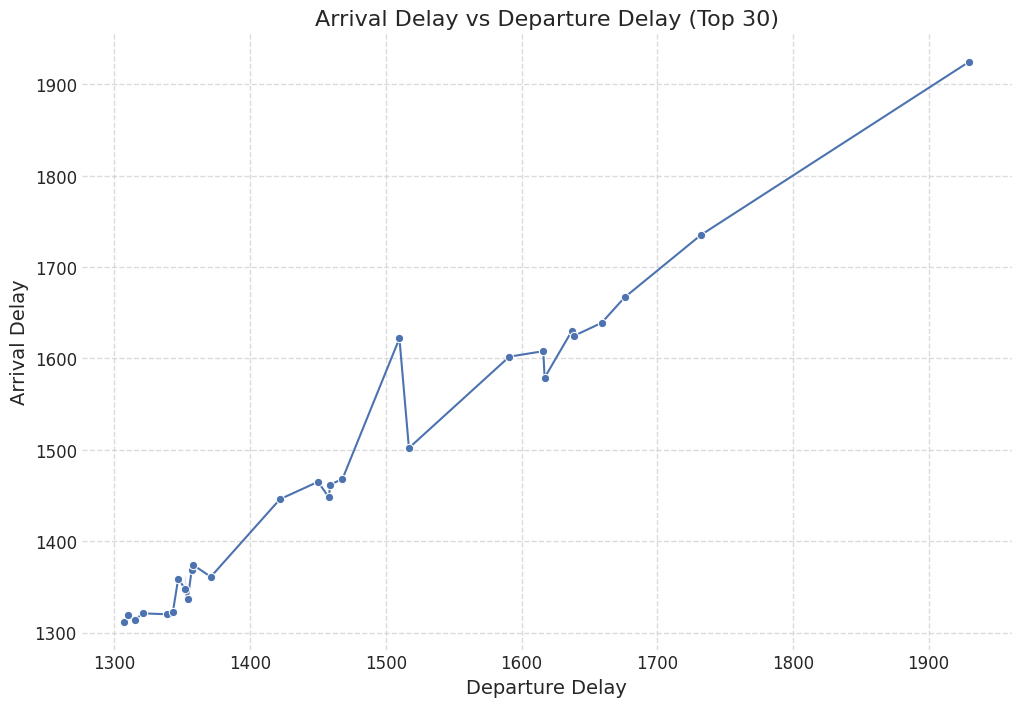

In [66]:
sns.set_style('whitegrid')

plt.figure(figsize=(12, 8))
sns.lineplot(data=top_30, x='DepDelay', y='ArrDelay', marker='o')
plt.title('Arrival Delay vs Departure Delay (Top 30)', fontsize=16)
plt.xlabel('Departure Delay', fontsize=14)
plt.ylabel('Arrival Delay', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

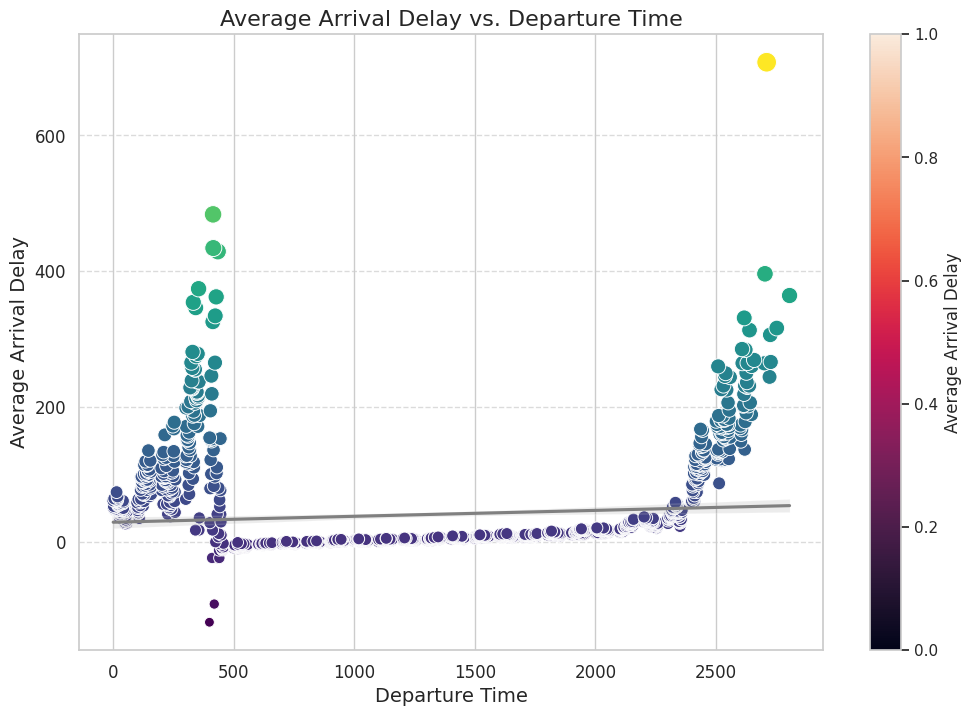

In [19]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='deptime', y='avg_arrdelay', data=optimal_time_of_day,
                          hue='avg_arrdelay', palette='viridis', size='avg_arrdelay',
                          sizes=(50, 200), legend=False)

sns.regplot(x='deptime', y='avg_arrdelay', data=optimal_time_of_day, scatter=False, color='gray')

plt.title('Average Arrival Delay vs. Departure Time', fontsize=16)
plt.xlabel('Departure Time', fontsize=14)
plt.ylabel('Average Arrival Delay', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
fig = plt.gcf()
cbar = fig.colorbar(scatter.collections[0])
cbar.set_label('Average Arrival Delay', fontsize=12)
plt.show()

<ipython-input-51-416b96822573>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='dayofweek', y='avg_arrdelay', data=optimal_time_of_week, palette='viridis', dodge=False)
<ipython-input-51-416b96822573>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(day_names)


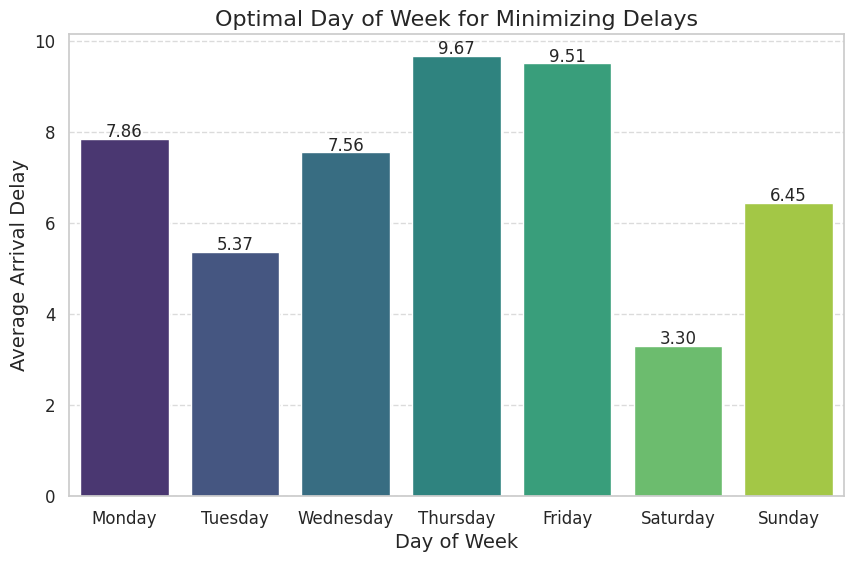

In [51]:
sns.set(style="whitegrid")

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='dayofweek', y='avg_arrdelay', data=optimal_time_of_week, palette='viridis', dodge=False)

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

ax.set_xticklabels(day_names)

plt.title('Optimal Day of Week for Minimizing Delays', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Average Arrival Delay', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([],[], frameon=False)
plt.show()

In [32]:
data = {
    'avg_weatherdelay': [0.66014],
    'avg_nasdelay': [3.367534],
    'avg_securitydelay': [0.019753],
    'avg_lateaircraftdelay': [3.663225],
    'avg_carrierdelay': [3.002814]
}

factors_delay = pd.DataFrame(data)

melted_df = factors_delay.melt(var_name='DelayType', value_name='AverageDelay')

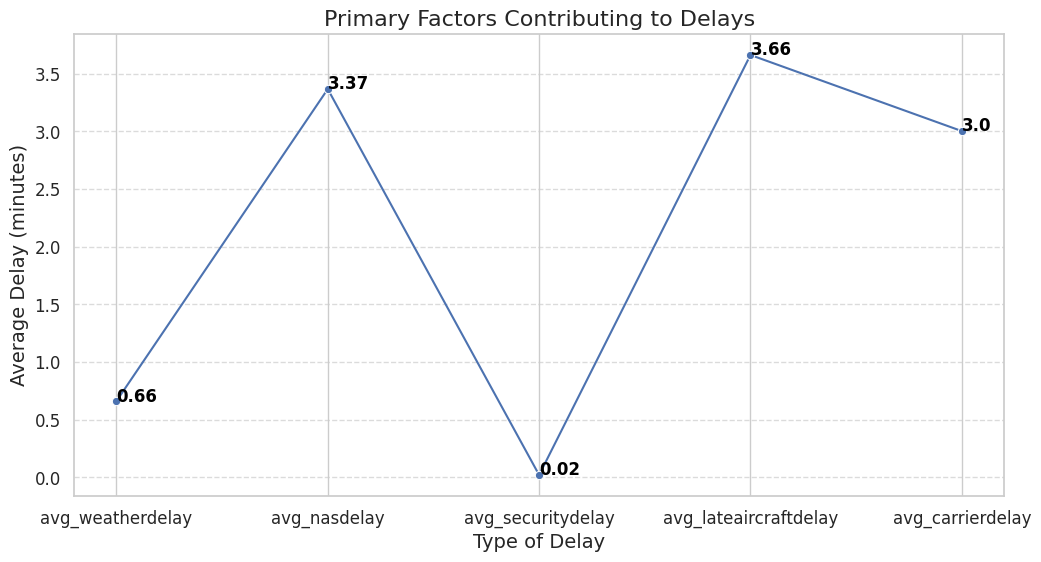

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='DelayType', y='AverageDelay', data=melted_df, marker='o')

plt.title('Primary Factors Contributing to Delays', fontsize=16)
plt.xlabel('Type of Delay', fontsize=14)
plt.ylabel('Average Delay (minutes)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for line in range(melted_df.shape[0]):
    plt.text(
        line,
        melted_df.AverageDelay[line],
        round(melted_df.AverageDelay[line], 2),
        horizontalalignment='left',
        size='medium',
        color='black',
        weight='semibold'
    )

plt.show()

<ipython-input-52-c89558602b7c>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-52-c89558602b7c>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='flightnum', y='cancellation_count', data=top_30, s=100, alpha=0.8, palette='viridis')


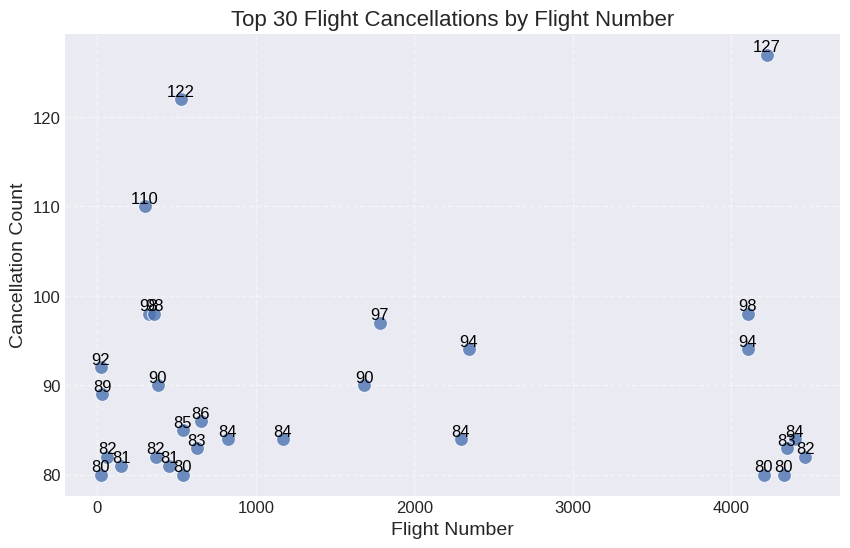

In [52]:
plt.style.use('seaborn-darkgrid')

top_30 = most_frequent_delay.sort_values(by='cancellation_count', ascending=False).head(30)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='flightnum', y='cancellation_count', data=top_30, s=100, alpha=0.8, palette='viridis')

plt.title('Top 30 Flight Cancellations by Flight Number', fontsize=16)
plt.xlabel('Flight Number', fontsize=14)
plt.ylabel('Cancellation Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

for index, row in top_30.iterrows():
    plt.text(row.flightnum, row.cancellation_count, f"{row.cancellation_count}", color='black', ha="center", va="bottom")

plt.show()

This plot visualizes the distribution of cancellation counts across all flight numbers. It shows how cancellation counts are distributed among different ranges of values.